# TUGAS BISNIS : 

### Apa masalahnya?



1. Bagaimana anggota tahunan dan pengendara biasa menggunakan sepeda Cyclistic secara berbeda?
2. Mengapa pengendara biasa membeli keanggotaan tahunan Cyclistic?
3. Bagaimana Cyclist menggunakan media digital untuk mempengaruhi pengendara biasa untuk menjadi anggota?
4. Bagaimana wawasan Anda dapat mendorong keputusan bisnis?

Jika kita tahu bagaimana pengendara biasa berbeda dari anggota tahunan, kita dapat mengembangkan strategi untuk menargetkan pengendara biasa dan mengubahnya menjadi anggota tahunan.

# DATASET :

Data berada di server AWS yang mudah diunduh dan diberi nama dengan benar. Saya mengunduh data 12 bulan sebelumnya dan menyimpannya secara lokal untuk langkah selanjutnya dalam proses analisis. Data ini disusun berdasarkan tahun dan kuartal fiskal. Datanya terkini, dikutip, asli tetapi tidak dapat diandalkan. Ada beberapa nilai nol dan outlier dalam data.

File-file disimpan dalam comma-seperated values (CSV).
Alat yang digunakan untuk menganalisis data ini adalah Excel dan Python

IMPORT LIBRARI YANG AKAN DIPAKAI

In [16]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

# PENGUMPULAN DATA

Dalam Analisis Data, langkah pertama adalah pengumpulan data di mana Anda mengumpulkan, memperoleh, dan mengukur data yang diperlukan dari sumber data internal atau eksternal yang tersedia, dan kemudian menyusun data ke dalam sistem yang sudah mapan. Saya akan menggunakan dataset Divvy untuk studi kasus. Tujuan dari skrip ini adalah untuk mengkonsolidasikan data Divvy yang diunduh ke dalam satu dataframe dan kemudian melakukan analisis sederhana untuk membantu menjawab pertanyaan kunci: "Dengan cara apa anggota dan pengendara biasa menggunakan sepeda Divvy secara berbeda?"

In [17]:
# mengimport dataset
df1 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202101-divvy-tripdata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202102-divvy-tripdata.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202103-divvy-tripdata.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202104-divvy-tripdata.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202105-divvy-tripdata.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202106-divvy-tripdata.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202107-divvy-tripdata.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202108-divvy-tripdata.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202109-divvy-tripdata.csv')
df10 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202110-divvy-tripdata.csv')
df11 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202111-divvy-tripdata.csv')
df12 = pd.read_csv('/content/drive/MyDrive/Dataset_Divvy/202112-divvy-tripdata.csv')

In [18]:
# menggabungkan semua data
Cyclistic_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
Cyclistic_data.shape

(5595063, 13)

Karena saya memiliki beberapa dataset yang harus digunakan untuk analisis, saya harus melakukan integrasi data dengan menggabungkan semua dataset ke dalam satu dataset.

In [19]:
Cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [20]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


Dataset berisi 4793590 baris record dan 13 kolom atribut. Tipe data atribut terdiri dari 13 tipe data objek, penggunaan ruang memori setidaknya 512,0 megabyte (MB). Langkah selanjutnya adalah pembersihan data untuk menghapus nilai null, reduksi data untuk menghapus atribut yang berlebihan dan nilai duplikat. Ini akan memastikan bahwa data berkualitas tinggi dan akan menghasilkan analisis yang berkualitas.

# PEMBERSIHAN DATA

Membuat cadangan dataset yang digabungkan, untuk memungkinkan saya kembali ke sana jika saya mengalami masalah apa pun selama analisis saya. Mengubah tipe data kolom 'rideable_type' dan 'member_casual' menjadi tipe data kategorikal dari tipe data objek. Menghilangkan kolom 'start_lat', 'start_lng', 'end_lat', 'end_lng' dari dataset karena mereka berlebihan dan tidak diperlukan untuk analisis saya. Juga tipe data untuk 'start_at', 'ended_at' diubah menjadi tipe data datetime. Saya juga menjalankan pemeriksaan untuk melihat apakah ada nilai Null. Rupanya ada banyak nilai null. Memisahkan dan Mengekstrak tanggal dari kolom start_at, mengubah tipe data start_date menjadi datetime, membuat kolom baru menjadi 'day_name' untuk mengekstrak hari yang tepat dalam seminggu dengan kata-kata bahwa wahana tersebut terjadi, mengubah tipe datanya menjadi tipe data kategorikal dan membuat dua kolom baru untuk bulan dan tahun wahana tersebut terjadi.

Selama proses pembersihan data, saya menemukan bahwa 13% dari dataset terdiri dari nilai nol yang berada di bawah maksimum 25%, jadi saya membatalkannya, saya juga mengurutkan data saya dengan urutan menaik, memeriksa data duplikat dan akhirnya menyimpan data yang sudah dibersihkan dalam file CSV baru. Dengan semua tugas ini dilakukan, dataset saya siap untuk dianalisis.

In [21]:
# membuat dataset backup
Cyclistic_data.to_csv('/content/drive/MyDrive/Dataset_Divvy/Cyclistic_data.csv')

In [22]:
# mengubah data type rideable_type dari objek menjadi category
Cyclistic_data['rideable_type']= Cyclistic_data.rideable_type.astype('category')

In [23]:
# hapus colom kolom 'start_lat', 'start_lng', 'end_lat', 'end_lng' dari dataset
Cyclistic_data.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis= 1, inplace=True)

In [24]:
#ubah data type 'started_at' dan 'ended_at' menjadi datetime
Cyclistic_data['started_at']= pd.to_datetime(Cyclistic_data['started_at'], errors='coerce')
Cyclistic_data['ended_at']= pd.to_datetime(Cyclistic_data['ended_at'], errors='coerce')

In [25]:
# menemukan nilai yang hilang
Cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
member_casual              0
dtype: int64

In [26]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
dtypes: category(1), datetime64[ns](2), object(6)
memory usage: 389.5+ MB


In [27]:
# menambahkan kolom baru ride_length (ended_at - started_at) untuk menghitung waktu tempuh
Cyclistic_data['ride_length'] = Cyclistic_data['ended_at'] - Cyclistic_data['started_at']
Cyclistic_data['ride_length']

0        0 days 00:10:25
1        0 days 00:04:04
2        0 days 00:01:20
3        0 days 00:11:42
4        0 days 00:00:43
               ...      
247535   0 days 00:19:13
247536   0 days 00:07:01
247537   0 days 00:08:17
247538   0 days 00:14:13
247539   0 days 00:03:37
Name: ride_length, Length: 5595063, dtype: timedelta64[ns]

In [28]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 10 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
dtypes: category(1), datetime64[ns](2), object(6), timedelta64[ns](1)
memory usage: 432.2+ MB


In [29]:
# memisahkan dan mengekstrak tanggal dari kolom 'started_at'
Cyclistic_data['start_date'] = Cyclistic_data.started_at.dt.date
Cyclistic_data['start_date'].head()

0    2021-01-23
1    2021-01-27
2    2021-01-21
3    2021-01-07
4    2021-01-23
Name: start_date, dtype: object

In [30]:
# Ubah tipe data start_date(day_of_week) menjadi type data Datetime
Cyclistic_data['start_date']= pd.to_datetime(Cyclistic_data.start_date)

In [31]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 11 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
 10  start_date          datetime64[ns] 
dtypes: category(1), datetime64[ns](3), object(6), timedelta64[ns](1)
memory usage: 474.9+ MB


In [32]:
Cyclistic_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:10:25,2021-01-23
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:04:04,2021-01-27
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:01:20,2021-01-21
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:11:42,2021-01-07
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,0 days 00:00:43,2021-01-23
...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,casual,0 days 00:19:13,2021-12-12
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,member,0 days 00:07:01,2021-12-06
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,member,0 days 00:08:17,2021-12-02
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,member,0 days 00:14:13,2021-12-13


In [33]:
# menemukan weekday dari tanggal 
Cyclistic_data['day_name'] = Cyclistic_data['start_date'].dt.day_name()
Cyclistic_data['day_name'].unique()

array(['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Friday',
       'Tuesday'], dtype=object)

In [34]:
# Merubah type data day_name menjadi data type category
Cyclistic_data['day_name'] = Cyclistic_data.day_name.astype('category')
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 12 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
 10  start_date          datetime64[ns] 
 11  day_name            category       
dtypes: category(2), datetime64[ns](3), object(6), timedelta64[ns](1)
memory usage: 480.2+ MB


In [35]:
# membuat colom baru tahun(year) dan bulan(month)
Cyclistic_data['year'] = pd.DatetimeIndex(Cyclistic_data['start_date']).year
Cyclistic_data['month'] = pd.DatetimeIndex(Cyclistic_data['start_date']).month                                

In [36]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
 10  start_date          datetime64[ns] 
 11  day_name            category       
 12  year                int64          
 13  month               int64          
dtypes: category(2), datetime64[ns](3), int64(2), object(6), timedelta64[ns](1)
memory usage: 565.6+ MB


In [37]:
Cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:10:25,2021-01-23,Saturday,2021,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:04:04,2021-01-27,Wednesday,2021,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:01:20,2021-01-21,Thursday,2021,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:11:42,2021-01-07,Thursday,2021,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,0 days 00:00:43,2021-01-23,Saturday,2021,1


In [ ]:
# ternyata disini colom year data typenya float maka harus ubah menjadi int
# Cyclistic_data['year'] = Cyclistic_data['year'].astype('int').fillna(0)

In [ ]:
# ternyata disini colom month data typenya float maka harus ubah menjadi int
# Cyclistic_data['month'] = Cyclistic_data['month'].astype('int').fillna(0)

In [38]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
 10  start_date          datetime64[ns] 
 11  day_name            category       
 12  year                int64          
 13  month               int64          
dtypes: category(2), datetime64[ns](3), int64(2), object(6), timedelta64[ns](1)
memory usage: 565.6+ MB


In [39]:
# mengurutkan dataframe by ascending menggunakan start_date

Cyclistic_data.sort_values(by=['start_date'], inplace = True, ascending = True)

In [40]:
Cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
member_casual              0
ride_length                0
start_date                 0
day_name                   0
year                       0
month                      0
dtype: int64

In [41]:
Cyclistic_data.shape

(5595063, 14)

In [42]:
# menemukan persentase total nilai nol dalam dataset
5595063/5595063

1.0

In [43]:
# hapus semua row yang nilainya kosong
Cyclistic_data.dropna(inplace= True)

In [44]:
Cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
65943,BC3CB970F08D36B6,electric_bike,2021-01-01 15:35:15,2021-01-01 15:44:46,Kingsbury St & Kinzie St,KA1503000043,Clark St & Elm St,TA1307000039,member,0 days 00:09:31,2021-01-01,Friday,2021,1
14763,5E125D8F1F7B1813,classic_bike,2021-01-01 14:26:46,2021-01-01 14:32:16,Columbus Dr & Randolph St,13263,New St & Illinois St,TA1306000013,member,0 days 00:05:30,2021-01-01,Friday,2021,1
58467,15ACCC355D076101,classic_bike,2021-01-01 20:02:09,2021-01-01 20:39:53,Fairbanks Ct & Grand Ave,TA1305000003,Field Blvd & South Water St,15534,member,0 days 00:37:44,2021-01-01,Friday,2021,1
12687,90EBA06FDFD44CFE,classic_bike,2021-01-01 13:12:14,2021-01-01 13:17:09,Federal St & Polk St,SL-008,Franklin St & Jackson Blvd,TA1305000025,member,0 days 00:04:55,2021-01-01,Friday,2021,1
22135,CBF551444E1D77B8,classic_bike,2021-01-01 16:47:56,2021-01-01 16:52:02,Paulina St & Howard St,515,Greenview Ave & Jarvis Ave,520,member,0 days 00:04:06,2021-01-01,Friday,2021,1


In [45]:
Cyclistic_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_length           0
start_date            0
day_name              0
year                  0
month                 0
dtype: int64

In [47]:
# simpan dataset yang sudah bersih
Cyclistic_data.to_csv('/content/drive/MyDrive/Dataset_Divvy/Cyclistic_data_cleaned.csv')

# ANALISIS DATA EKSPLORASI (EDA)

Analisis Data Eksplorasi, adalah langkah penting dalam setiap Analisis Data atau proyek Ilmu Data. EDA adalah proses menyelidiki dataset untuk menemukan pola, dan anomali (outlier), dan membentuk hipotesis berdasarkan pemahaman kita tentang dataset. 

Ini melibatkan pembuatan statistik ringkasan untuk data numerik dalam dataset dan membuat berbagai representasi grafis untuk memahami data dengan lebih baik. Saya menghitung mean, jumlah total, min, max, dan standar deviasi dari panjang perjalanan semua jenis pengguna, kemudian saya menghapus nilai negatif dalam dataset yang memiringkan hasil saya, kemudian saya memfilter panjang perjalanan untuk anggota dan pengendara biasa, langkah selanjutnya adalah menghitung modus hari kerja untuk semua pengguna yaitu hari dimana pengguna menggunakan sepeda motor. 

Langkah selanjutnya adalah menghitung moda hari kerja untuk semua pengguna, yaitu hari dimana pengguna paling banyak menggunakan sepeda yaitu pada hari Sabtu, melakukan hal yang sama hanya untuk anggota menunjukkan bahwa anggota lebih banyak menggunakan sepeda pada hari Rabu dan mengulangi proses yang sama untuk pengendara biasa menunjukkan bahwa mereka lebih aktif pada hari Sabtu. Kemudian saya menghitung jumlah perjalanan pengguna dalam seminggu, yang kemudian saya ulangi untuk anggota dan pengendara biasa, ini menunjukkan bahwa anggota menggunakan sepeda lebih banyak dalam seminggu dibandingkan dengan pengendara biasa. 

Analisis ini menunjukkan bahwa anggota Cyclistic lebih banyak menggunakan sepeda terutama selama pertengahan minggu, tetapi selalu ada lonjakan pengguna biasa pada hari Sabtu. Hal ini menunjukkan bahwa anggota Cyclistic menggunakan sepeda mereka untuk pergi ke tempat kerja dan kembali sementara pengguna biasa kebanyakan menggunakan sepeda pada akhir pekan untuk tugas-tugas kecil.

In [48]:
# cek apakah ada data duplikat
Cyclistic_data.duplicated().any()

False

In [49]:
# menghitung rata-rata panjang perjalanan dari semua jenis pengguna

Cyclistic_data.ride_length.describe(datetime_is_numeric= True)

count                      4588302
mean     0 days 00:21:48.637676421
std      0 days 03:04:25.503842186
min              -1 days +23:04:06
25%                0 days 00:06:57
50%                0 days 00:12:12
75%                0 days 00:22:07
max               38 days 20:24:09
Name: ride_length, dtype: object

In [50]:
# Filter Nilai negatif
negative_duration = Cyclistic_data['ride_length'] < '00:00:00'
# tunjukkan jumlah durasi waktu negatif
Cyclistic_data[negative_duration].count()

ride_id               116
rideable_type         116
started_at            116
ended_at              116
start_station_name    116
start_station_id      116
end_station_name      116
end_station_id        116
member_casual         116
ride_length           116
start_date            116
day_name              116
year                  116
month                 116
dtype: int64

In [51]:
Cyclistic_data.drop(Cyclistic_data[negative_duration].index, inplace= True)

In [52]:
member_filter = Cyclistic_data['member_casual'] == 'member'
Cyclistic_data[member_filter].ride_length.describe()

count                      2539431
mean     0 days 00:13:11.022482989
std      0 days 00:17:32.901085710
min                0 days 00:00:00
25%                0 days 00:05:43
50%                0 days 00:09:43
75%                0 days 00:16:31
max                1 days 00:55:38
Name: ride_length, dtype: object

In [53]:
Cyclistic_data[~member_filter].ride_length.describe()

count                      2048013
mean     0 days 00:32:30.635092648
std      0 days 04:34:58.555432792
min                0 days 00:00:00
25%                0 days 00:09:30
50%                0 days 00:16:39
75%                0 days 00:30:39
max               38 days 20:24:09
Name: ride_length, dtype: object

In [54]:
# menghitung modus hari kerja dari semua pengguna
mode_week_day = Cyclistic_data['day_name'].mode()
mode_week_day

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

In [55]:
# menghitung modus hari kerja Member
mode_week_day_member = Cyclistic_data[Cyclistic_data['member_casual'] == 'member']
mode_week_day_member = mode_week_day_member['day_name'].mode()
mode_week_day_member

0    Wednesday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

In [56]:
# menghitung modus hari kerja Pengguna Biasa
mode_week_day_casual = Cyclistic_data[Cyclistic_data['member_casual'] == 'casual']
mode_week_day_casual = mode_week_day_casual['day_name'].mode()
mode_week_day_casual

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

In [58]:
# menghitung jumlah perjalanan oleh pengguna dalam seminggu dengan menambahkan jumlah ride_id ke nilai
count_users = Cyclistic_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Friday       655709
Monday       575326
Saturday     825264
Sunday       714852
Thursday     597585
Tuesday      602976
Wednesday    615732
Name: ride_id, dtype: int64

In [59]:
# menghitung jumlah perjalanan anggota dalam seminggu
count_members = Cyclistic_data[Cyclistic_data['member_casual'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       365711
Monday       346428
Saturday     357020
Sunday       311167
Thursday     373416
Tuesday      388071
Wednesday    397618
Name: ride_id, dtype: int64

In [60]:
# menghitung jumlah perjalanan yang dilakukan oleh pengendara biasa dalam seminggu
count_casual = Cyclistic_data[Cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casual

day_name
Friday       289998
Monday       228898
Saturday     468244
Sunday       403685
Thursday     224169
Tuesday      214905
Wednesday    218114
Name: ride_id, dtype: int64

# VISUALISASI

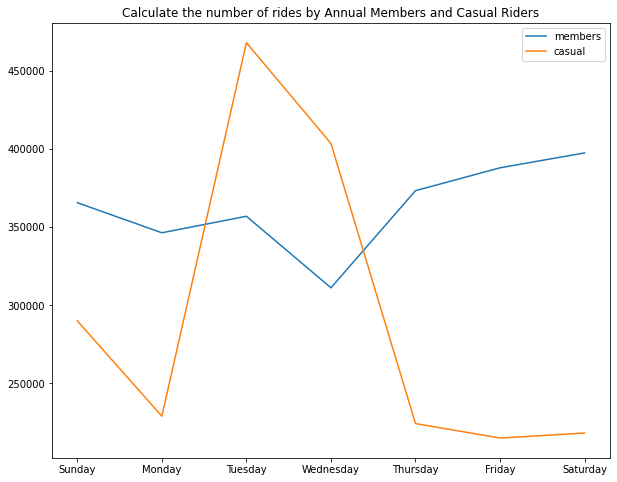

In [61]:
# plot grafik untuk jumlah perjalanan oleh pengendara biasa dan anggota tahunan 
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values)
plt.plot(count_casual.index, count_casual.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casual.index, labels)
plt.show()

Visualisasi jumlah perjalanan oleh Anggota Tahunan dan Pengendara Biasa. Dari visualisasi ini, kita dapat melihat bahwa ada lonjakan jumlah wahana oleh pengendara biasa dan penurunan tajam jumlah wahana oleh anggota selama pertengahan minggu, juga jumlah wahana oleh anggota meningkat secara stabil untuk anggota selama akhir pekan dan juga penurunan besar dalam jumlah wahana oleh pengendara biasa selama periode yang sama.

In [62]:
# menghitung rata-rata lama perjalanan untuk semua pengguna dalam seminggu
user_avg_rides = Cyclistic_data.groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_rides

day_name
Friday      0 days 00:20:48.576697894
Monday      0 days 00:20:38.878588834
Saturday    0 days 00:26:11.803202369
Sunday      0 days 00:27:50.981617173
Thursday    0 days 00:18:13.650349322
Tuesday     0 days 00:18:14.297945523
Wednesday   0 days 00:18:03.538635315
Name: ride_length, dtype: timedelta64[ns]

In [63]:
# menghitung rata-rata lama perjalanan untuk Member dalam seminggu
user_avg_members = Cyclistic_data[Cyclistic_data['member_casual'] == 'member'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_members

day_name
Friday      0 days 00:12:47.563775768
Monday      0 days 00:12:43.518309720
Saturday    0 days 00:14:49.105277015
Sunday      0 days 00:15:11.692814469
Thursday    0 days 00:12:21.218391820
Tuesday     0 days 00:12:23.223956440
Wednesday   0 days 00:12:27.483320674
Name: ride_length, dtype: timedelta64[ns]

In [64]:
# menghitung rata-rata lama perjalanan untuk casual_riders dalam seminggu
user_avg_casual = Cyclistic_data[Cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_casual 

day_name
Friday      0 days 00:30:55.173008089
Monday      0 days 00:32:38.317425228
Saturday    0 days 00:34:52.336969614
Sunday      0 days 00:37:36.253843962
Thursday    0 days 00:28:00.724083169
Tuesday     0 days 00:28:48.260087015
Wednesday   0 days 00:28:16.161585226
Name: ride_length, dtype: timedelta64[ns]

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


<function matplotlib.pyplot.show(*args, **kw)>

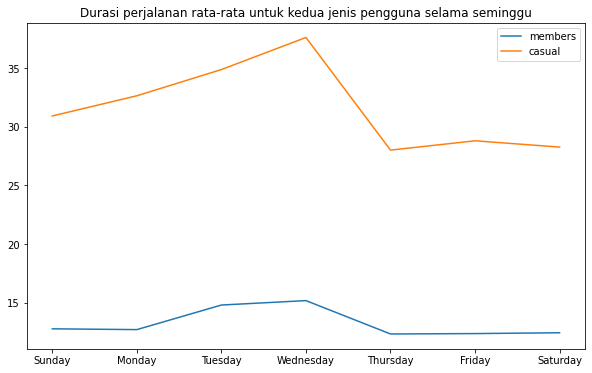

In [77]:
# plot rata-rata panjang perjalanan untuk pengguna yang berbeda selama seminggu
plt.figure(figsize = (10,6))
plt.plot(user_avg_members/pd.Timedelta(minutes=1))
plt.plot(user_avg_casual/pd.Timedelta(minutes=1))
plt.title('Durasi perjalanan rata-rata untuk kedua jenis pengguna selama seminggu')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

In [66]:
# memeriksa jumlah pengguna di setiap jenis selama 12 bulan terakhir
user_types = Cyclistic_data['member_casual'].value_counts()
user_types

member    2539431
casual    2048013
Name: member_casual, dtype: int64

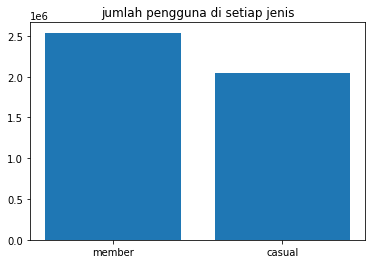

In [78]:
plt.title('jumlah pengguna di setiap jenis')
plt.bar(user_types.index, user_types.values)
plt.show()

Text(0.5, 1.0, 'Diagram Pie pengguna di setiap jenis')

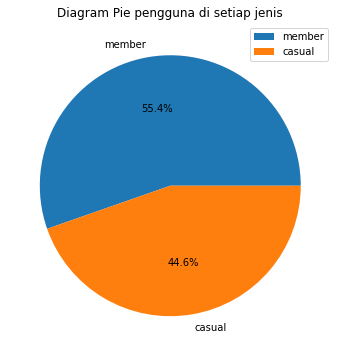

In [79]:
# untuk memplot diagram lingkaran pengguna di setiap tipe 
plt.figure(figsize = (9,6))
plt.pie(user_types.values, labels= user_types.index, autopct= '%1.1f%%')
plt.legend(user_types.index)
plt.show
plt.title('Diagram Pie pengguna di setiap jenis')

Pada grafik batang dan diagram lingkaran, menunjukkan bahwa cyclisic sebagai perusahaan memiliki lebih banyak anggota tahunan(Member) daripada pengendara biasa.

In [69]:
# Untuk memeriksa jumlah pengguna untuk ride_type tertentu
ride_type = Cyclistic_data.groupby('member_casual')['rideable_type'].value_counts()
ride_type

member_casual               
casual         classic_bike     1261331
               electric_bike     474679
               docked_bike       312003
member         classic_bike     1980041
               electric_bike     559389
               docked_bike            1
Name: rideable_type, dtype: int64

In [83]:
# untuk memisahkan jumlah pengguna menjadi anggota dan pengendara biasa berdasarkan jenis perjalanan
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pengendara Member dan Casual selama berbulan-bulan berdasarkan ride_type')

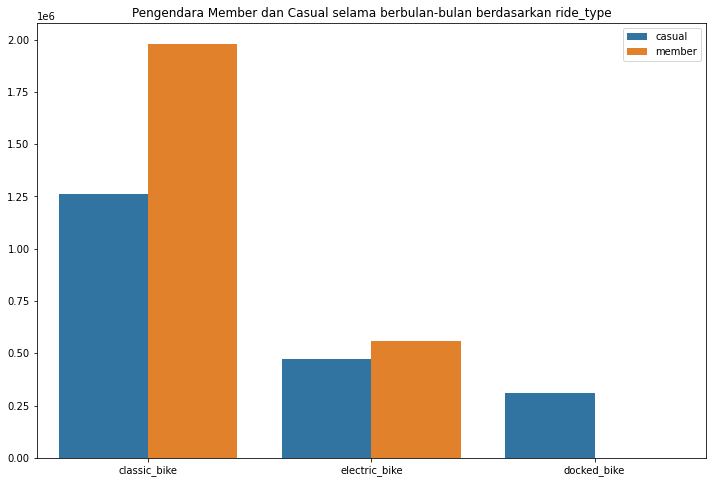

In [84]:
# untuk memplot jumlah pengguna menjadi anggota dan pengendara biasa berdasarkan jenis pengendara
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member)
plt.title('Pengendara Member dan Casual selama berbulan-bulan berdasarkan ride_type')

Grafik batang menunjukkan bahwa anggota lebih banyak menggunakan sepeda dan juga pada jenis Docked_bike hanya pengendara biasa yang menggunakan sepeda docked_bikes.

In [81]:
#untuk memilah jumlah pengguna menjadi anggota(member) dan kasual dari tahun ke tahun
users_over_year = Cyclistic_data.groupby('year')['member_casual'].value_counts()
users_over_year 

year  member_casual
2021  member           2539431
      casual           2048013
Name: member_casual, dtype: int64

In [73]:
# untuk mendapatkan jumlah total pengguna di setiap kategori per bulan
users_over_month = Cyclistic_data.groupby('month')['member_casual'].value_counts()
users_over_month

month  member_casual
1      member            68801
       casual            14688
2      member            34370
       casual             8612
3      member           130016
       casual            75624
4      member           177752
       casual           120393
5      member           234112
       casual           216785
6      member           304537
       casual           304144
7      casual           369356
       member           322856
8      casual           341427
       member           332880
9      member           328152
       casual           292893
10     member           288797
       casual           189080
11     member           185890
       casual            69950
12     member           131268
       casual            45061
Name: member_casual, dtype: int64

Ini menghitung jumlah pengguna per bulan di setiap kategori, dan hasilnya menunjukkan bahwa anggota tahunan yang berlangganan lebih banyak menggunakan sepeda sepeda daripada pengendara biasa kecuali selama bulan Juli dan Agustus ketika ada lonjakan pengendara biasa.

In [86]:
#untuk memilah jumlah pengguna menjadi anggota dan kasual selama berbulan-bulan
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Member dan casual selama berbulan-bulan')

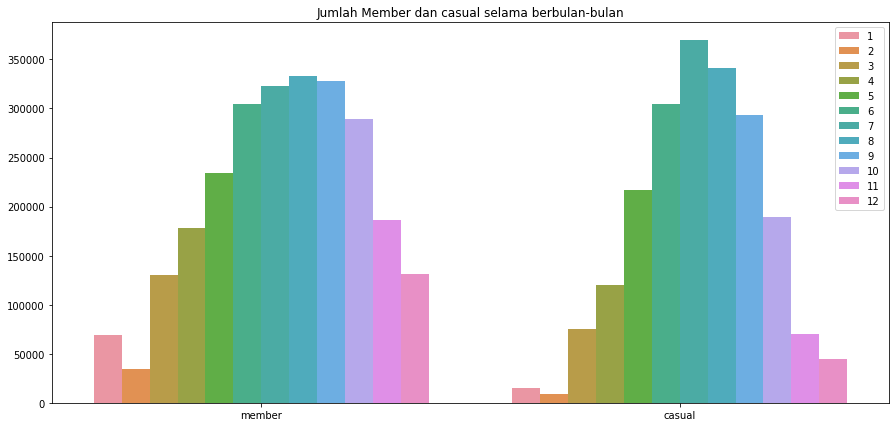

In [87]:
# plot jumlah anggota(member) dan pengendara biasa(casual)
plt.figure(figsize= (15,7))
sns.barplot(list_x, list_y, hue =list_month)
plt.title('Jumlah Member dan casual selama berbulan-bulan')

Grafik ini memplot jumlah anggota dan pengendara biasa per bulan, dan ini berkorelasi dengan perhitungan saya di atas

# KESIMPULAN

### MASUKAN



*   Cyclistic memiliki lebih banyak anggota tahunan yang berlangganan daripada pengendara biasa
*   Pengendara biasa menggunakan sepeda untuk jangka waktu yang lebih lama dibandingkan dengan anggota tahunan
*   Pengendara kasual banyak menggunakan sepeda selama pertengahan minggu (Selasa, Rabu) sementara Anggota Tahunan lebih banyak menggunakan sepeda dari hari Kamis hingga akhir pekan.
*   Ada juga lonjakan pengendara Casual selama bulan Juli dan Agustus.
*   Jenis sepeda Docked Bike memiliki lebih sedikit pengendara tahunan yang menggunakannya dibandingkan dengan pengendara kasual yang lebih banyak menggunakannya.

# REKOMENDASI



1.   Karena sebagian besar pengendara biasa menggunakan sepeda selama seminggu, strategi pemasaran kami harus menargetkan pengendara biasa yang menggunakan sepeda untuk perjalanan ke tempat kerja.
2.   Dengan lonjakan pengendara biasa selama bulan Juli dan Agustus, kami harus menempatkan lebih banyak sumber daya pemasaran kami pada periode musim panas untuk mendatangkan lebih banyak pelanggan tetapi dari pengendara biasa kami dan orang-orang yang belum menggunakan sepeda kami.
3.   Diskon harus diberikan pada jenis Docked Bike untuk menarik lebih banyak pengendara untuk menggunakannya dan menarik pengendara biasa untuk berlangganan paket tahunan kami.









# Nama : Lamnidar Muharamsah